In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.stattools import adfuller, acf, pacf

In [97]:
plt.rcParams["figure.figsize"] = (12,7)
sns.set(rc={'axes.facecolor':'#f9ecf2', 'figure.facecolor':'#f3d8e5'})

# Matching assessment

### generating variables from ARMA(p,q)

In [113]:
variance = 5.585924888195411e-05

ar_coef = np.array([1,-0.858062233958621,1.1340569699396175,-0.8063796604424552,0.6118108838984688,-0.42548709502360826,0.5682133973734969,-0.5268137475119263,0.18799442410141978])
ma_coef = np.array([1, -0.6167629280654143, 0.6986845596791114,-0.8265355972543396,0.3437823144287383,-0.4739641009798614,0.5210036693326232,-0.3767135639758061])

arma_process = lambda ar_coef, ma_coef, scale_val: ArmaProcess(ar_coef, ma_coef).generate_sample(nsample=1000, scale=scale_val)

arma_matrix = np.array([arma_process(ar_coef, ma_coef, variance) for i in range(1000)])

stationary = pd.read_csv("C:/Users/wypyc/Desktop/repozytoria/ARMA/ARMA-Netflix-time-series/data/stationary.csv")

np.shape(arma_matrix) #every row is a new X trajectory

(1000, 1000)

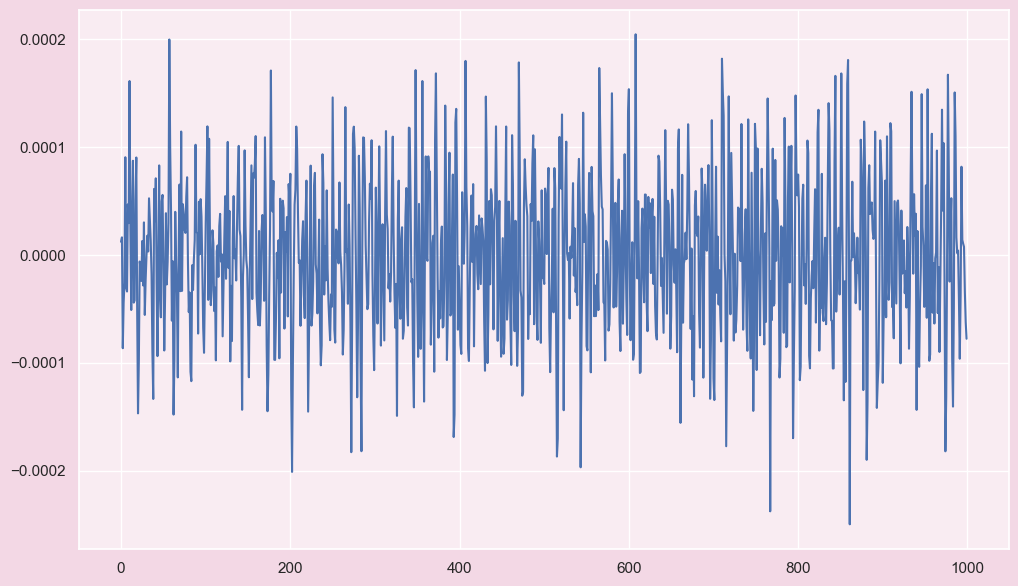

In [114]:
plt.plot(arma_process(ar_coef,ma_coef,variance))

In [121]:
def acvf_empir(x, h):
    h = abs(h)
    mean_x = np.mean(x)
    n = len(x)
    
    from_h = x[h:]
    to_nh = x[:n-h]
    
    output = (1/n)*sum((from_h - mean_x)*(to_nh - mean_x))
    return output

def acf_empir(x, h):
    return acvf_empir(x,h)/acvf_empir(x,0)

H = np.arange(0,100)

In [122]:
acf_matrix = np.array([acf(arma_matrix[k], nlags = len(H)-1) for k in range(len(arma_matrix))])
pacf_matrix = np.array([pacf(arma_matrix[k], nlags = len(H)-1) for k in range(len(arma_matrix))])


In [123]:
q5 = np.quantile(acf_matrix, 0.05, axis = 0)
q95 = np.quantile(acf_matrix, 0.95, axis = 0)

q5_p = np.quantile(pacf_matrix, 0.05, axis = 0)
q95_p = np.quantile(pacf_matrix, 0.95, axis = 0)


In [124]:
my_arma = arma_process(ar_coef, ma_coef, variance)
my_pacf = pacf(my_arma, nlags = len(H)-1)
my_acf = acf(my_arma, nlags = len(H)-1)

In [125]:
stationary_acf = acf(stationary,nlags = len(H)-1)
stationary_pacf = pacf(stationary,nlags = len(H)-1)

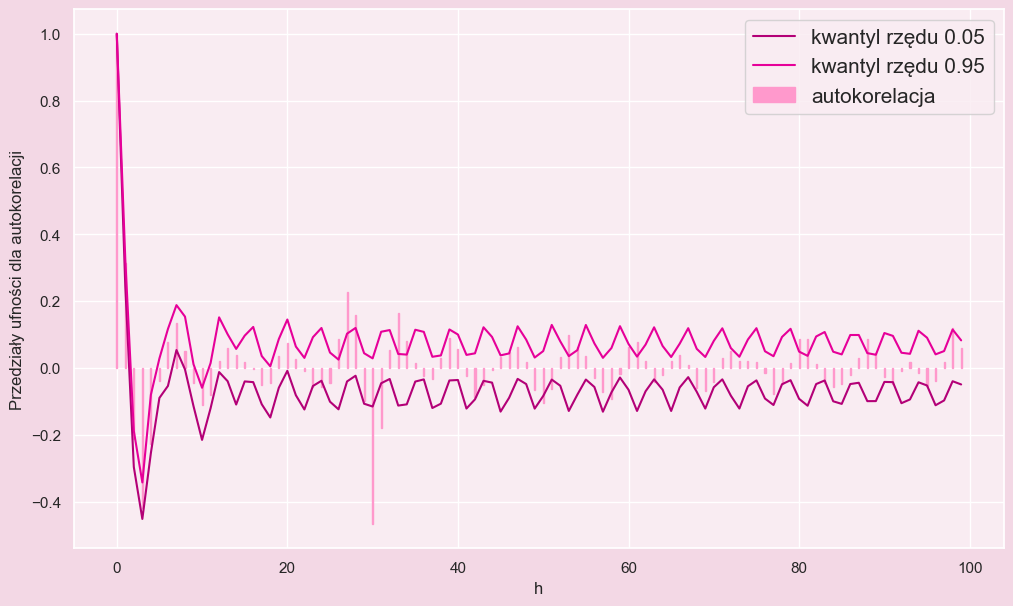

In [129]:
plt.plot(H, q5, color = '#b30077', label = "kwantyl rzędu 0.05")
plt.plot(H, q95, color = '#e60099', label = "kwantyl rzędu 0.95" )
plt.bar(H, stationary_acf, color = '#ff99cc', edgecolor = '#ff99cc', label = "autokorelacja", width=0.125)
plt.xlabel("h")
plt.ylabel("Przedziały ufności dla autokorelacji")
plt.legend(fontsize = '15')
plt.savefig("./images/s_acf.pdf", bbox_inches='tight')

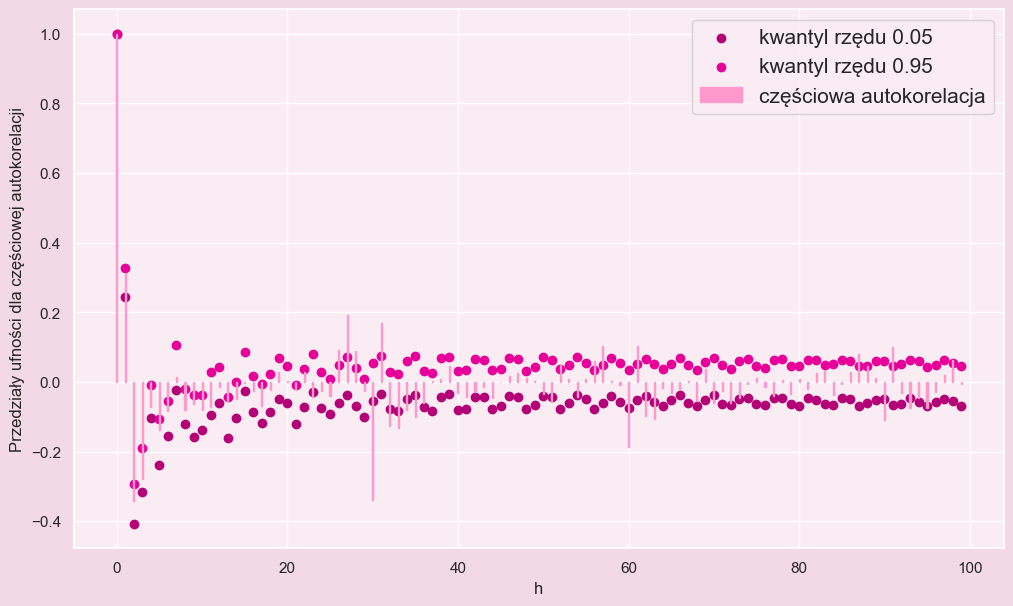

In [130]:
plt.scatter(H, q5_p, color = '#b30077', label = "kwantyl rzędu 0.05")
plt.scatter(H, q95_p, color = '#e60099', label = "kwantyl rzędu 0.95" )
plt.bar(H, stationary_pacf, color = '#ff99cc', edgecolor = '#ff99cc', label = "częściowa autokorelacja", width=0.125)
plt.xlabel("h")
plt.ylabel("Przedziały ufności dla częściowej autokorelacji")
plt.legend(fontsize = '15')
plt.savefig("./images/s_pacf.pdf", bbox_inches='tight')

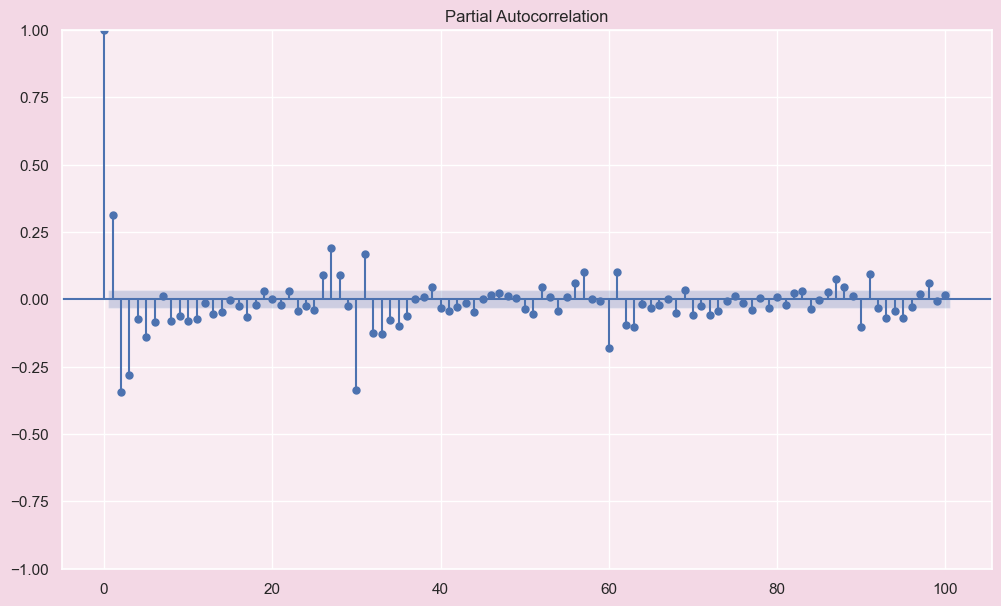

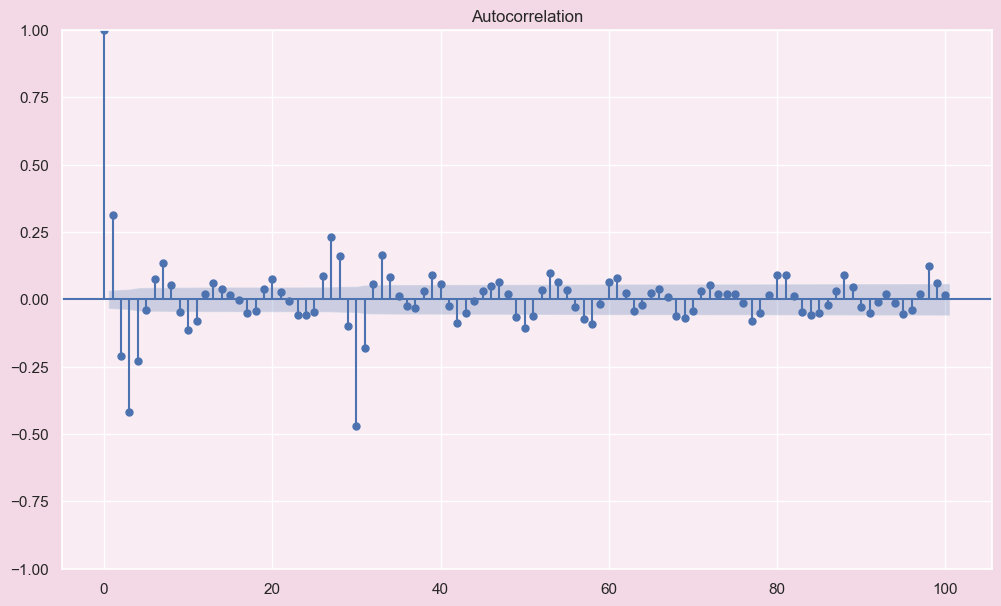

In [132]:
plot_pacf(stationary, lags = 100, method = 'ywm')
plot_acf(stationary, lags=100, adjusted=True);

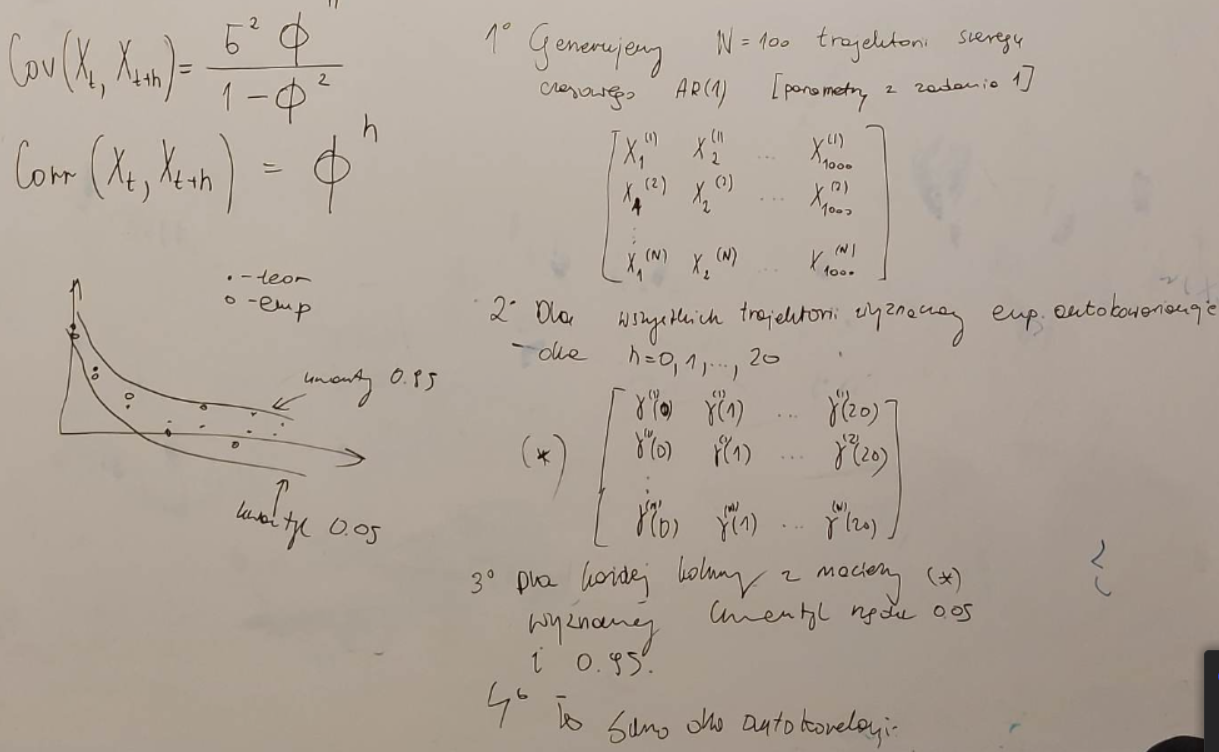